# F1Tenth lap simulation with an algorithmic controller
This is the baseline F1Tenth simulation of a race, with the Pure Pursuit controller for the autonomous racecar.

In [1]:
# Mount GDrive, change directory and check contents of folder.
import os
from google.colab import drive, files

PROJECT_FOLDER = "/content/gdrive/My Drive/Colab Notebooks/Risto"

drive.mount('/content/gdrive/')
os.chdir(PROJECT_FOLDER)
print("Current dir: ", os.getcwd())
print("-"*80)
!ls
print("_"*80)
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mounted at /content/gdrive/
Current dir:  /content/gdrive/My Drive/Colab Notebooks/Risto
--------------------------------------------------------------------------------
 config_example_map.yaml		     MLModels
 custom					     models
 Dockerfile				     params.yaml
 docs					     raceline.py
 envs					     required_packages_colab.txt
 EvaluateF1Tenth.py			     required_packages.txt
 evaluating.py				     required_packages_working.txt
 f110gym				     RLBox2D_v3.ipynb
'F1Tenth Race Simulation - Baseline.ipynb'   setup.py
'F1Tenth Race Simulation - RL Agent.ipynb'   simple_eval.py
 f1tenth_racetracks			     simple_example.py
'F1Tenth Train RL Agent.ipynb'		     stable_baselines3
 HelloRacing.py				     TrainBox2D.py
 __Keep__Techniques.ipynb		     TrainingF1Tenth.py
 LICENSE				     Videos
 mllib
________________________________________________________________________________
Thu Jun  1 15:42:46 2023       
+-----------------------------------------------------------------------------+
|

## Required Libraries
We check for the proper versions of the installed Python packages.

In [2]:
!pip list | grep -E "librosa|numpy|tensorflow|torch"
print("-"*40)
!pip list | grep -E "gym|gymnasium|pygame"
print("-"*40)
!pip list | grep -E "Pillow|scipy|numba|pyyaml|pyglet|wandb|shapely|opencv-python|tensorboard|pandas|shimmy"



librosa                       0.10.0.post2
numpy                         1.22.4
tensorflow                    2.12.0
tensorflow-datasets           4.9.2
tensorflow-estimator          2.12.0
tensorflow-gcs-config         2.12.0
tensorflow-hub                0.13.0
tensorflow-io-gcs-filesystem  0.32.0
tensorflow-metadata           1.13.1
tensorflow-probability        0.20.1
torch                         2.0.1+cu118
torchaudio                    2.0.2+cu118
torchdata                     0.6.1
torchsummary                  1.5.1
torchtext                     0.15.2
torchvision                   0.15.2+cu118
----------------------------------------
gym                           0.25.2
gym-notices                   0.0.8
pygame                        2.3.0
----------------------------------------
numba                         0.56.4
opencv-python                 4.7.0.72
opencv-python-headless        4.7.0.72
pandas                        1.5.3
pandas-datareader             0.10.0
pandas-gbq

### Uninstall upgraded/downgraded libraries
We remove libraries to install their proper versions

In [3]:
!pip uninstall Pillow -y
!pip uninstall pyyaml -y
!pip uninstall pyglet -y
!pip uninstall gym -y
!pip uninstall numba -y
!pip uninstall numpy -y

Found existing installation: Pillow 8.4.0
Uninstalling Pillow-8.4.0:
  Successfully uninstalled Pillow-8.4.0
Found existing installation: PyYAML 6.0
Uninstalling PyYAML-6.0:
  Successfully uninstalled PyYAML-6.0
Found existing installation: gym 0.25.2
Uninstalling gym-0.25.2:
  Successfully uninstalled gym-0.25.2
Found existing installation: numba 0.56.4
Uninstalling numba-0.56.4:
  Successfully uninstalled numba-0.56.4
Found existing installation: numpy 1.22.4
Uninstalling numpy-1.22.4:
  Successfully uninstalled numpy-1.22.4


### Install all required libraries


In [4]:
!pip install -r required_packages_colab.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 20.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 37.1 MB/s eta 0:00:00
     ━

In [ ]:
!python --version

Python 3.10.11


### Re-mount after restart
After restarting the runtime, we check again the installed Python packages to confirm that the requirements are installed.

In [1]:
import os
from google.colab import drive, files

PROJECT_FOLDER = "/content/gdrive/My Drive/Colab Notebooks/Risto"

drive.mount('/content/gdrive/')
os.chdir(PROJECT_FOLDER)

!pip list | grep -E "gym|gymnasium|pygame|numpy"
print("-"*40)
!pip list | grep -E "Pillow|scipy|numba|pyyaml|pyglet|wandb|shapely|opencv-python|tensorboard|pandas|shimmy"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
gym                           0.17.0
gym-notices                   0.0.8
gymnasium                     0.28.1
numpy                         1.24.3
pygame                        2.4.0
----------------------------------------
numba                         0.57.0
opencv-python                 4.7.0.72
opencv-python-headless        4.7.0.72
pandas                        1.5.3
pandas-datareader             0.10.0
pandas-gbq                    0.17.9
Pillow                        9.0.1
pyglet                        1.4.10
scipy                         1.10.1
shapely                       2.0.1
sklearn-pandas                2.2.0
tensorboard                   2.12.2
tensorboard-data-server       0.7.0
tensorboard-plugin-wit        1.8.1
wandb                         0.15.3


### Build and install f110gym package
This installs this project's subfolder /f110gym as a Python package. This is required to register f110 as a gym environment

In [2]:
!cat setup.py

from setuptools import setup

setup(name='f110gym',
      version='0.2.1',
      author='Hongrui Zheng',
      author_email='billyzheng.bz@gmail.com',
      url='https://f1tenth.org',
      package_dir={'': 'f110gym'},
      install_requires=['gym==0.17.0',
		        'numpy<=1.24.3,>=1.18.0',
                        'Pillow>=9.0.1',
                        'scipy>=1.7.3',
                        'numba>=0.55.2',
                        'pyyaml>=5.3.1',
                        'pyglet<1.5',
                        'pyopengl']
      )


In [3]:
!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/gdrive/My%20Drive/Colab%20Notebooks/Risto
  Preparing metadata (setup.py) ... done
  Running setup.py develop for f110gym


### Installing Virtual Display for Colab
After the installation of Linux packages with apt you should manually restart the runtime.

In [4]:
!apt install xvfb ffmpeg -y > /dev/null 2>&1
!pip install pyvirtualdisplay
!pip install piglet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 5.0 MB/s eta 0:00:00


## Simulation

### Manual restart, re-mount and virtual display creation
You should manually restart the runtime and the run this cell to re-mount and create the virtual display for Colab.

In [1]:
import os
from google.colab import drive, files
from pyvirtualdisplay import Display

PROJECT_FOLDER = "/content/gdrive/My Drive/Colab Notebooks/Risto"

drive.mount('/content/gdrive/')
os.chdir(PROJECT_FOLDER)

!pip list | grep -E "f110"

oDisplayDevice = Display(visible=0, size=(640, 480))
oDisplayDevice.start()

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
f110-gym                      0.2.1
f110gym                       0.2.1                 /content/gdrive/My Drive/Colab Notebooks/Risto/f110gym


### Vehicle physics

These are the setup of the F1Tenth environment for the vehicle behaviour.

* mu         : surface friction coefficient
* C_Sf       : Cornering stiffness coefficient, front
* C_Sr       : Cornering stiffness coefficient, rear
* lf         : Distance from center of gravity to front axle
* lr         : Distance from center of gravity to rear axle
* h          : Height of center of gravity
* m          : Total mass of the vehicle
* I          : Moment of inertial of the entire vehicle about the z axis
* s_min      : Minimum steering angle constraint
* s_max      :   Maximum steering angle constraint
* sv_min     : Minimum steering velocity constraint
* sv_max     : Maximum steering velocity constraint
* v_switch   : Switching velocity (velocity at which the acceleration is no longer able to create wheel spin)
* a_max      : Maximum longitudinal acceleration
* v_min      : Minimum longitudinal velocity
* v_max      : Maximum longitudinal velocity
* width      : width of the vehicle in meters
* length     : length of the vehicle in meters
  '''    


In [20]:
import time
import numpy as np
from envs import F1RaceTrack, VideoRecorderAV
from models.baseline import PurePursuitPlanner
from mllib import CFileStore

SPEED_TO_REAL_RATIO = 1
SPEED_LIMIT = 30
MAX_BRAKING = -np.ceil(SPEED_LIMIT/1.8)
VEHICLE_CONFIG = {   "tlad" : { "value": 0.82461887897713965 ,"descr": "Lookahead distance for the pure pursuit planner" }
                    ,"vgain": { "value": 1.375               ,"descr": "Deprecated, it is calcualted by Agent.SpeedLimitKPH" }
                    ,"Agent.SpeedLimitKPH"  : { "value": SPEED_LIMIT  ,"descr": "The maximum speed allowed for the self-driving agent" }
                    ,"Agent.MaxBrakingInKPH": { "value": MAX_BRAKING  ,"descr": "The maximum negative speed (for braking) that can be set" }
                  }

print(f"Speed Limit {SPEED_LIMIT:.0f} Max Braking {MAX_BRAKING:.0f}") 

dParams = {     'mu': 1.0489, 'C_Sf': 4.718, 'C_Sr': 5.4562
              , 'lf': 0.15875, 'lr': 0.17145, 'h': 0.074, 'm': 3.74
              , 'I': 0.04712
              , 's_min': -0.4189, 's_max': 0.4189
              , 'sv_min': -3.2, 'sv_max': 3.2
              , 'v_switch': 7.319, 'a_max': 9.51
              , 'v_min': VEHICLE_CONFIG["Agent.MaxBrakingInKPH"]["value"] / 3.6
              , 'v_max': VEHICLE_CONFIG["Agent.SpeedLimitKPH"]["value"] / 3.6
              , 'width': 0.31, 'length': 0.58
              , "speed_adjust_to_real": SPEED_TO_REAL_RATIO
           } 
           

Speed Limit 30 Max Braking -17


### Run parameters

In [21]:
IS_PREVIEW        = True
IS_FAST_RENDERING = True
IS_VISUALIZING    = False
IS_RECORDING      = False
if IS_RECORDING:
  IS_FAST_RENDERING = True
  IS_VISUALIZING    = True

#SELECTED_RACETRACK = "example"
#SELECTED_RACETRACK = "Catalunya"
#SELECTED_RACETRACK = "Nuerburgring"
SELECTED_RACETRACK = "Austin" # Pure Pursuit crashed in the straight line just after start  

## Racetrack and Video Recorder

In [22]:
# Create file stores and determine filenames
oVideosFS  = CFileStore("Videos")
if SELECTED_RACETRACK == "example":
  sVideoFilename = oVideosFS.File("race_baseline.mp4")
else:
  sVideoFilename = oVideosFS.File(SELECTED_RACETRACK + ".mp4")

oRacetracksFS = CFileStore("f1tenth_racetracks") 
print("-"*40, "Videos", "-"*40)
print(oVideosFS.DirectoryEntries)

# Create the racetrack 
oRaceTrack = F1RaceTrack(oRacetracksFS.File(SELECTED_RACETRACK), 
                          is_fast_rendering=IS_FAST_RENDERING, is_recording=IS_RECORDING, car_params=dParams) 

if IS_RECORDING:
  oRecorder  = VideoRecorderAV(sVideoFilename, (1000,800))
  oRecorder.start()
  print(f"Recording video: {sVideoFilename}")  

---------------------------------------- Videos ----------------------------------------
['race_baseline.mp4', 'example_03.mp4', 'example_05.mp4', 'example_06.mp4', 'Catalunya_06.mp4', 'Catalunya_02.mp4', 'example_08.mp4', 'example_10.mp4', 'example_09.mp4', 'example_01.mp4', 'example_02.mp4', 'example_04.mp4', 'example_07.mp4', 'Catalunya_11.mp4', 'Austin_12.mp4', 'Austin_13.mp4']
Initializing Vehicle
  |__  orientation:-37.1degs
  |___ starting wp:2032 total wps:2034
  |___ coords:[-0.48138431 -0.63756935]


## Autonomous Driving Agent Model
This is a simple Pure Pursuit planner that should receive additional input the raceline waypoints (here: `oRaceTrack.raceline`) as input in order to drive the vehicle.


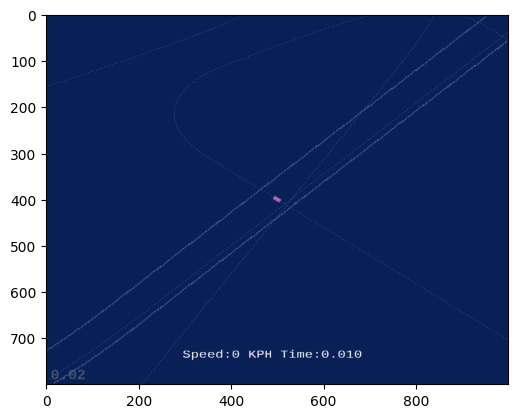

In [23]:
import matplotlib.pyplot as plt

oPlanner = PurePursuitPlanner(oRaceTrack.config, (0.17145+0.15875), oRaceTrack.raceline
                              , lookahead_dist=VEHICLE_CONFIG['tlad']["value"]
                              , speed_limiter=VEHICLE_CONFIG["Agent.SpeedLimitKPH"]["value"]) 

# Initializes the environment and shows a screenshot
state, step_interval_secs, done, info = oRaceTrack.reset(pure_pursuit_planner=oPlanner)
if IS_VISUALIZING or IS_PREVIEW:
  nImage = oRaceTrack.render()
  
  plt.imshow(oRaceTrack.screenshot)
  plt.show()

### Run the simulation

In [24]:
# Runs a complete episode (2 laps)
two_laps_time = 0.0
dtStartSimulation = time.time()

nSteps = 0
oSpeeds = []
while not done:
  # Agent decides action based on data from the current state
  vehicle_x, vehicle_y, vehicle_theta = state['poses_x'][0], state['poses_y'][0], state['poses_theta'][0]
  speed, steer = oPlanner.plan(vehicle_x, vehicle_y, vehicle_theta)
  
  # Agent performs action on the environment and it transitions to a new state (effects of the action)
  nActionOnEnv = np.array([[steer, speed]])                            
  state, step_interval_secs, done, info = oRaceTrack.step(nActionOnEnv)
  
  nSpeed = oRaceTrack.vehicle_speed(state)
  oSpeeds.append(nSpeed)
  
  two_laps_time += step_interval_secs

  if IS_VISUALIZING:    
    nImage = oRaceTrack.render()
    if IS_RECORDING and oRaceTrack.env.is_period_start:
      oRecorder.add_frame(nImage)
    if nSteps % 100 == 0:
      print(f"Step {nSteps} Speed: {nSpeed:.1f} Km/h")

  nSteps += 1
  
nSpeeds = np.array(oSpeeds)
nElapsed = time.time() - dtStartSimulation

if IS_RECORDING:
  oRecorder.end()

### Show the simulation results

In [25]:
nLapCount,nRaceTime = state["lap_counts"][0], state["lap_times"][0]
vehicle_theta = state["poses_theta"][0]
if nLapCount > 0:
  nLapTime = nRaceTime / nLapCount
  
  print(f"Race results:")
  print(f"  |__ Vehicle max speed: {SPEED_LIMIT*SPEED_TO_REAL_RATIO} Km/h")
  print(f"  |__ Average Lap Time:{nLapTime:.3f}sec | Average Speed:{nSpeeds.mean():.1f} Km/h")
  print(f"  |__ Race time:{nRaceTime:.3f}sec (simulation run time: {nElapsed:.3f}sec)")
else:
  bHasCrashed = state['collisions'][0]
  bHasSpun    = abs(vehicle_theta) > 100
  if bHasCrashed:
    print("Vehicle has crashed!")
    print(f"  |__ At race time:{nRaceTime:.3f}sec (simulation run time: {nElapsed:.3f}sec)")
    print(f"  |__ Turn Angle: {vehicle_theta:.3f}")
    print(f"  |__ Vehicle max speed: {SPEED_LIMIT*SPEED_TO_REAL_RATIO} Km/h")
  elif bHasSpun:
    print("Vehicle has spun!")
    print(f"  |__ At race time:{nRaceTime:.3f}sec (simulation run time: {nElapsed:.3f}sec)")
    print(f"  |__ Turn Angle: {vehicle_theta:.3f}")
    print(f"  |__ Vehicle max speed: {SPEED_LIMIT*SPEED_TO_REAL_RATIO} Km/h")

Vehicle has crashed!
  |__ At race time:5.180sec (simulation run time: 0.661sec)
  |__ Turn Angle: 0.000
  |__ Vehicle max speed: 30 Km/h


### Play the video

In [ ]:
print("-"*40, "Videos", "-"*40)
print(oVideosFS.DirectoryEntries)

---------------------------------------- Videos ----------------------------------------
['race_baseline.mp4', 'example_03.mp4', 'example_05.mp4', 'example_06.mp4', 'Catalunya_06.mp4', 'Catalunya_02.mp4', 'example_08.mp4', 'example_10.mp4', 'example_09.mp4', 'example_01.mp4', 'example_02.mp4', 'example_04.mp4', 'example_07.mp4']


In [ ]:
from moviepy import editor
editor.ipython_display( oVideosFS.File("race_baseline.mp4") )

Output hidden; open in https://colab.research.google.com to view.